turns  3001
kinetic energy initial, final  12.0136628 53.1259356


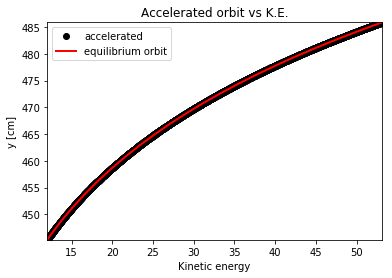

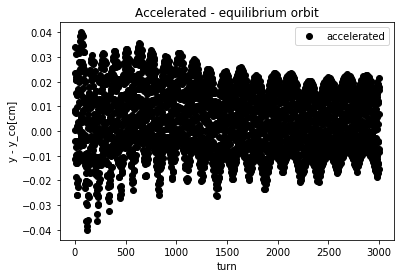

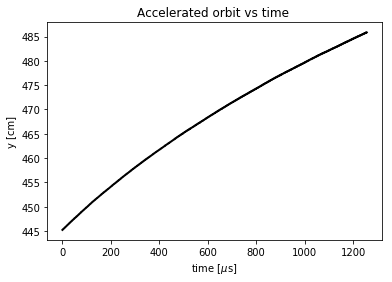

In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
import sys
import os

#Alternatively, use numpy loadtxt to read the columns directly.
FL=os.getcwd()
coords = np.loadtxt('%s/%s'%(FL,'zgoubi.fai'),skiprows=2,usecols=(8,9,10,13,14,23),unpack=True)

#y,t,z,p are the horizontal coordinate and angle and the vertical coordinate and angle, respectively.
dm, y, t, s, time,ke_mev = coords
d = dm + 1 #d = p/p0

#read closed orbit coords
co_coords = np.loadtxt('%s/%s'%(FL,'searchCO.out_COs'),skiprows=0,usecols=(0,1,5,6,8),unpack=True)

y_co, t_co, d_co, tof_co, ke_mev_co = co_coords

y_co_interp = np.interp(ke_mev, ke_mev_co, y_co)

print "turns ",len(d)
print "kinetic energy initial, final ",ke_mev[0], ke_mev[-1]

plt.plot(ke_mev,y, 'ko', linewidth=2, label='accelerated')
plt.plot(ke_mev_co, y_co, 'r', linewidth=2, label='equilibrium orbit')
plt.ylabel('y [cm]')
plt.xlabel('Kinetic energy')
plt.ylim(min(y),max(y))
plt.xlim(ke_mev[0], max(ke_mev))
plt.title('Accelerated orbit vs K.E.')
plt.legend()
plt.show()

plt.plot(y-y_co_interp, 'ko', linewidth=2, label='accelerated')
plt.ylabel('y - y_co[cm]')
plt.xlabel('turn')
#plt.ylim(min(y),max(y))
#plt.xlim(ke_mev[0], max(ke_mev))
plt.title('Accelerated - equilibrium orbit')
plt.legend()
plt.show()


plt.plot(time,y, 'k', linewidth=2)
plt.ylabel('y [cm]')
plt.xlabel('time [$\mu$s]')
plt.title(r'Accelerated orbit vs time ')
#plt.legend()
plt.show()
